In [31]:
from common.tools import Reddit
from common.translations import IO
import pandas as pd
from datetime import datetime as dt
import os
import matplotlib.pyplot as plt

In [2]:
r = Reddit()
r.subreddits

['SecurityAnalysis', 'StockMarket', 'wallstreetbets']

# Load Data

In [3]:
df = r.load_raw_text(os.path.join(r.filepath, r.subreddits[1]))
df.head().style

,title,selftext,created_at
0,"Over 600 million shares of China Insurance will be auctioned, yet no one sign up even with 10% off in starting price","Recently, Alibaba’s auction website showed that the 633 million shares of China Insurance held by Zhongrong Xinda Group will be auctioned, with 1.69 yuan per share and a total valuation of more than 1 billion yuan. The starting price is 962 million yuan, accounting for 90% of the estimated price. The auction will be held from 10:00 on July 2 to 10:00 on July 3. Although the starting price is 10% off, very few people responded. At present, 13 people have set reminders for this auction and 781 checked this information, but no one has signed up for bidding. It is worth mentioning that in January 2017, this equity was pledged by Zhongrong Xinda to AVIC Trust and has now been frozen by the court. This is not the first time that China Insurance's equity got auctioned. From September 26 to 27, 2019, Zhongrong Xinda held an auction for its 1.15% equity in China Insurance, which was 169 million shares. At that time, the assessed price was 285 million yuan, but the starting price was 200 million yuan, discounted by nearly 30%. It was finally suspended because ""the existing outsider filed an objection to the auction subject of this case."" In 2016, Zhongrong Xinda bought stakes of China Insurance, holding 7.79% of the shares, and became the company's second largest shareholder. However, in April 2020, Zhongrong Xinda had a debt crisis - its own funds could not provide strong support for debt repayment, and it got involved in a number of lawsuits and equity freezes. source: Zhongke Caijing translation: InsurView",2021-06-25
1,a deep-dive analysis of media sentiment surrounding Bitcoin over the past 90 days (3/25-6/23),"We will analyze Bitcoin’s news conversation over the past 90 days, and determine whether it’s currently overhyped or if now is the time to snipe. In 2021 $BTC price has followed a head and shoulders pattern, starting the year at $30K, doubling to an elated peak of $63K per coin in mid-April, and falling back down to the $30K-$40K price range in recent weeks (the past 90 days are shown in the chart above). Some speculate that this puzzling performance is indicative of institutional manipulation (search “Wycoff BTC” on Twitter One thing is for sure over the past 90 days: Bitcoin has gone from an emotional high of significant optimism to one of the most pessimistic and fearful tickers on the internet, and it has taken the entire cryptocurrency market with it. As of today, the investor sentiment Fear & Greed Index points to “extreme fear” over the past 90 days Bitcoin news sentiment has trended definitively downwards, falling below the neutral line from optimistic to pessimistic just last week. Overall, $BTC was still more optimistic and less speculative than both the FAANG stocks and S&P 500 in the news over the last 90 days. we can see a clear correlation between the weekly price of Bitcoin and its news sentiment and time-sense. Bitcoin’s news sentiment showed a 0.496 correlation with price (considered significant), and Bitcoin’s news time-sense showed a -0.766 correlation with price (a strong correlation) over the past 90 days. news is more reactive and past-oriented when things are going good, but when things take a turn downwards, news articles tend become more speculative. So where does this leave us? This is the part of the report where we determine if Bitcoin is currently overhyped in the news (and due for a correction), or if it’s underhyped and time to put some money into it. We call this our Hype-Or-Snipe scale, Based on our analysis, we have determined that Bitcoin is currently SLIGHTLY undervalued in the news, and receives a Hype-Or-Snipe rating of +0.05.",2021-06-25
2,How To Use Point and Figure Charts?,,2021-06-25
3,Back from the abyss after fifteen months.,,2021-06-25
4,RMED short squeeze potential,"RMED is a very high risk but very high reward situation given this

In [4]:
df.shape

(1144, 3)

# Text pre-processing

In [5]:
import re
import string

In [6]:
text = df.title.iloc[0]

In [7]:
def cleaning(text):
    text = text.lower()
    text = re.sub("\[.*\]", "", text)
    text = re.sub("\(.*\)", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub("\w*\d\w*", "", text)
    text = re.sub("\s{2}", " ", text)
    text = text.encode("ascii", "ignore").decode("ascii") # removing emojis
    return text

In [8]:
df["title_cleaned"] = df.title.apply(lambda t: cleaning(t))
df["selftext_cleaned"] = df.selftext.apply(lambda t: cleaning(t))

In [9]:
df.head()

,title,selftext,created_at,title_cleaned,selftext_cleaned
0,Over 600 million shares of China Insurance wil...,"Recently, Alibaba’s auction website showed tha...",2021-06-25,over million shares of china insurance will be...,recently alibabasauction website showed that t...
1,a deep-dive analysis of media sentiment surrou...,We will analyze Bitcoin’s news conversation ov...,2021-06-25,a deepdive analysis of media sentiment surroun...,we will analyze bitcoins news conversation ove...
2,How To Use Point and Figure Charts?,,2021-06-25,how to use point and figure charts,
3,Back from the abyss after fifteen months.,,2021-06-25,back from the abyss after fifteen months,
4,RMED short squeeze potential,RMED is a very high risk but very high reward ...,2021-06-25,rmed short squeeze potential,rmed is a very high risk but very high reward ...


# Word tokenizing

In [10]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
stop_words = set(stopwords.words("english"))

In [12]:
df["title_tokens"] = df.title_cleaned.apply(lambda t: [token for token in word_tokenize(t) if token not in stop_words])

In [13]:
df.head()

,title,selftext,created_at,title_cleaned,selftext_cleaned,title_tokens
0,Over 600 million shares of China Insurance wil...,"Recently, Alibaba’s auction website showed tha...",2021-06-25,over million shares of china insurance will be...,recently alibabasauction website showed that t...,"[million, shares, china, insurance, auctioned,..."
1,a deep-dive analysis of media sentiment surrou...,We will analyze Bitcoin’s news conversation ov...,2021-06-25,a deepdive analysis of media sentiment surroun...,we will analyze bitcoins news conversation ove...,"[deepdive, analysis, media, sentiment, surroun..."
2,How To Use Point and Figure Charts?,,2021-06-25,how to use point and figure charts,,"[use, point, figure, charts]"
3,Back from the abyss after fifteen months.,,2021-06-25,back from the abyss after fifteen months,,"[back, abyss, fifteen, months]"
4,RMED short squeeze potential,RMED is a very high risk but very high reward ...,2021-06-25,rmed short squeeze potential,rmed is a very high risk but very high reward ...,"[rmed, short, squeeze, potential]"


In [14]:
from nltk.probability import FreqDist

flatten = lambda nested_list: [elm for sublist in nested_list for elm in sublist]

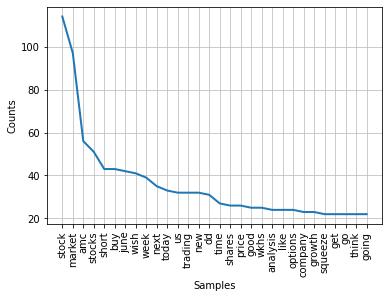

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
FreqDist(flatten(df.title_tokens)).plot(30)

## Bigram

In [16]:
df["bigrams"] = df.title_tokens.apply(lambda t: list(nltk.bigrams(t)))

In [17]:
df.head()

,title,selftext,created_at,title_cleaned,selftext_cleaned,title_tokens,bigrams
0,Over 600 million shares of China Insurance wil...,"Recently, Alibaba’s auction website showed tha...",2021-06-25,over million shares of china insurance will be...,recently alibabasauction website showed that t...,"[million, shares, china, insurance, auctioned,...","[(million, shares), (shares, china), (china, i..."
1,a deep-dive analysis of media sentiment surrou...,We will analyze Bitcoin’s news conversation ov...,2021-06-25,a deepdive analysis of media sentiment surroun...,we will analyze bitcoins news conversation ove...,"[deepdive, analysis, media, sentiment, surroun...","[(deepdive, analysis), (analysis, media), (med..."
2,How To Use Point and Figure Charts?,,2021-06-25,how to use point and figure charts,,"[use, point, figure, charts]","[(use, point), (point, figure), (figure, charts)]"
3,Back from the abyss after fifteen months.,,2021-06-25,back from the abyss after fifteen months,,"[back, abyss, fifteen, months]","[(back, abyss), (abyss, fifteen), (fifteen, mo..."
4,RMED short squeeze potential,RMED is a very high risk but very high reward ...,2021-06-25,rmed short squeeze potential,rmed is a very high risk but very high reward ...,"[rmed, short, squeeze, potential]","[(rmed, short), (short, squeeze), (squeeze, po..."


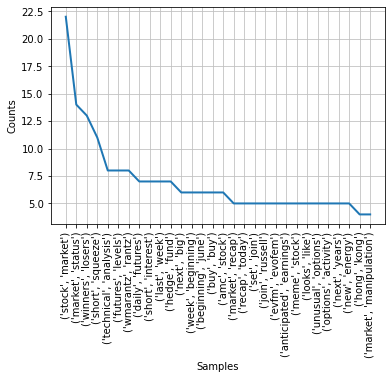

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
FreqDist(flatten(df.bigrams)).plot(30)

## Trigrams

In [19]:
df["trigrams"] = df.title_tokens.apply(lambda t: list(nltk.trigrams(t)))

In [20]:
df.head()

,title,selftext,created_at,title_cleaned,selftext_cleaned,title_tokens,bigrams,trigrams
0,Over 600 million shares of China Insurance wil...,"Recently, Alibaba’s auction website showed tha...",2021-06-25,over million shares of china insurance will be...,recently alibabasauction website showed that t...,"[million, shares, china, insurance, auctioned,...","[(million, shares), (shares, china), (china, i...","[(million, shares, china), (shares, china, ins..."
1,a deep-dive analysis of media sentiment surrou...,We will analyze Bitcoin’s news conversation ov...,2021-06-25,a deepdive analysis of media sentiment surroun...,we will analyze bitcoins news conversation ove...,"[deepdive, analysis, media, sentiment, surroun...","[(deepdive, analysis), (analysis, media), (med...","[(deepdive, analysis, media), (analysis, media..."
2,How To Use Point and Figure Charts?,,2021-06-25,how to use point and figure charts,,"[use, point, figure, charts]","[(use, point), (point, figure), (figure, charts)]","[(use, point, figure), (point, figure, charts)]"
3,Back from the abyss after fifteen months.,,2021-06-25,back from the abyss after fifteen months,,"[back, abyss, fifteen, months]","[(back, abyss), (abyss, fifteen), (fifteen, mo...","[(back, abyss, fifteen), (abyss, fifteen, mont..."
4,RMED short squeeze potential,RMED is a very high risk but very high reward ...,2021-06-25,rmed short squeeze potential,rmed is a very high risk but very high reward ...,"[rmed, short, squeeze, potential]","[(rmed, short), (short, squeeze), (squeeze, po...","[(rmed, short, squeeze), (short, squeeze, pote..."


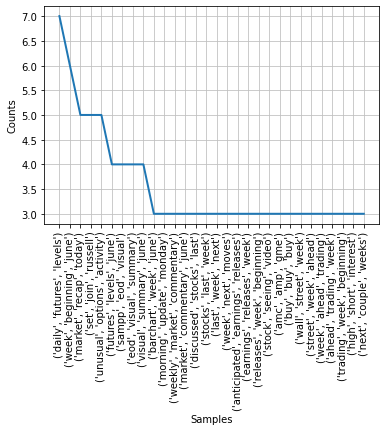

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
FreqDist(flatten(df.trigrams)).plot(30)

# Part of speech tagging
* shares are NN or JJ (noun or adjective)

In [22]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
df["pos"] = df.title_tokens.apply(lambda t: nltk.pos_tag(t))

In [24]:
df.head()

,title,selftext,created_at,title_cleaned,selftext_cleaned,title_tokens,bigrams,trigrams,pos
0,Over 600 million shares of China Insurance wil...,"Recently, Alibaba’s auction website showed tha...",2021-06-25,over million shares of china insurance will be...,recently alibabasauction website showed that t...,"[million, shares, china, insurance, auctioned,...","[(million, shares), (shares, china), (china, i...","[(million, shares, china), (shares, china, ins...","[(million, CD), (shares, NNS), (china, JJ), (i..."
1,a deep-dive analysis of media sentiment surrou...,We will analyze Bitcoin’s news conversation ov...,2021-06-25,a deepdive analysis of media sentiment surroun...,we will analyze bitcoins news conversation ove...,"[deepdive, analysis, media, sentiment, surroun...","[(deepdive, analysis), (analysis, media), (med...","[(deepdive, analysis, media), (analysis, media...","[(deepdive, JJ), (analysis, NN), (media, NNS),..."
2,How To Use Point and Figure Charts?,,2021-06-25,how to use point and figure charts,,"[use, point, figure, charts]","[(use, point), (point, figure), (figure, charts)]","[(use, point, figure), (point, figure, charts)]","[(use, NN), (point, NN), (figure, NN), (charts..."
3,Back from the abyss after fifteen months.,,2021-06-25,back from the abyss after fifteen months,,"[back, abyss, fifteen, months]","[(back, abyss), (abyss, fifteen), (fifteen, mo...","[(back, abyss, fifteen), (abyss, fifteen, mont...","[(back, RB), (abyss, RB), (fifteen, JJ), (mont..."
4,RMED short squeeze potential,RMED is a very high risk but very high reward ...,2021-06-25,rmed short squeeze potential,rmed is a very high risk but very high reward ...,"[rmed, short, squeeze, potential]","[(rmed, short), (short, squeeze), (squeeze, po...","[(rmed, short, squeeze), (short, squeeze, pote...","[(rmed, VBN), (short, JJ), (squeeze, NN), (pot..."


# Sentiment Analysis
__Output:__
* sentiment score (how positive/negative)
* subjectivity score (how opinionated)

In [25]:
from textblob import TextBlob

In [26]:
df["textblob_score"] = df.title.apply(lambda t: TextBlob(t).sentiment)

In [27]:
df.head()

,title,selftext,created_at,title_cleaned,selftext_cleaned,title_tokens,bigrams,trigrams,pos,textblob_score
0,Over 600 million shares of China Insurance wil...,"Recently, Alibaba’s auction website showed tha...",2021-06-25,over million shares of china insurance will be...,recently alibabasauction website showed that t...,"[million, shares, china, insurance, auctioned,...","[(million, shares), (shares, china), (china, i...","[(million, shares, china), (shares, china, ins...","[(million, CD), (shares, NNS), (china, JJ), (i...","(0.0, 0.1)"
1,a deep-dive analysis of media sentiment surrou...,We will analyze Bitcoin’s news conversation ov...,2021-06-25,a deepdive analysis of media sentiment surroun...,we will analyze bitcoins news conversation ove...,"[deepdive, analysis, media, sentiment, surroun...","[(deepdive, analysis), (analysis, media), (med...","[(deepdive, analysis, media), (analysis, media...","[(deepdive, JJ), (analysis, NN), (media, NNS),...","(-0.25, 0.25)"
2,How To Use Point and Figure Charts?,,2021-06-25,how to use point and figure charts,,"[use, point, figure, charts]","[(use, point), (point, figure), (figure, charts)]","[(use, point, figure), (point, figure, charts)]","[(use, NN), (point, NN), (figure, NN), (charts...","(0.0, 0.0)"
3,Back from the abyss after fifteen months.,,2021-06-25,back from the abyss after fifteen months,,"[back, abyss, fifteen, months]","[(back, abyss), (abyss, fifteen), (fifteen, mo...","[(back, abyss, fifteen), (abyss, fifteen, mont...","[(back, RB), (abyss, RB), (fifteen, JJ), (mont...","(0.0, 0.0)"
4,RMED short squeeze potential,RMED is a very high risk but very high reward ...,2021-06-25,rmed short squeeze potential,rmed is a very high risk but very high reward ...,"[rmed, short, squeeze, potential]","[(rmed, short), (short, squeeze), (squeeze, po...","[(rmed, short, squeeze), (short, squeeze, pote...","[(rmed, VBN), (short, JJ), (squeeze, NN), (pot...","(0.0, 0.65)"


In [101]:
freq = FreqDist(df.textblob_score.to_list())
values = list(zip(*freq))
sizes = list(freq.values())
colors = ["r" if v < 0 else "b" for v in values[0]]

Text(0.5, 1.0, 'TextBlob Sentiment Analysis Score')

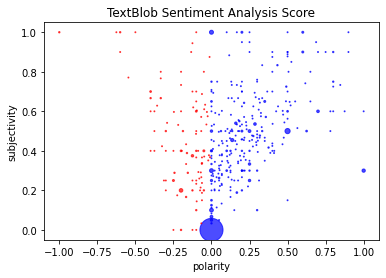

In [107]:
plt.scatter(*values, s=sizes, alpha=.7, c=colors)
plt.xlabel("polarity")
plt.ylabel("subjectivity")
plt.title("TextBlob Sentiment Analysis Score")

# Topic Modeling LDA (Latent Dirichlet Allocation)

In [ ]:
from gensim import matutils, models